<a href="https://colab.research.google.com/github/othinAbbey/Prediction-of-Product-Sales/blob/main/Onyango_Abbey_Project1_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Student Name: Onyango Abbey

## Overview
#### objectives:

- Data Loading and Inspection: The dataset is loaded and inspected to understand its structure and contents.

- Data Cleaning: Remove the placeholders and replace them with null values.

- Exploratory Data Analysis: Various visualizations such as histograms, boxplots, countplots, and heatmaps are utilized to explore the distribution.

# Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

# import Data

In [7]:
fpath = "/content/drive/MyDrive/Course 1/Week 2/Data Folder/sales_predictions_2023.csv"

## Read Data

In [9]:
sales_df = pd.read_csv(fpath)
sales_df.info()
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Create a copy of the data

In [12]:
#
sales_df_copy = sales_df.copy()

# Data Cleaning

## Data Interpretation

#### The data types

In [13]:
sales_df_copy.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### The duplicates

In [16]:
sales_df_copy.duplicated(keep = False)
sales_df_copy.duplicated(keep = False).sum()

0

#### percentage uniqueness

In [17]:
sales_df_copy.nunique() / len(sales_df_copy) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

#### Filtering  "Item_Identifier" column for  duplicates occurence

In [18]:
item_identifier_duplicates = sales_df_copy.duplicated(subset=['Item_Identifier'], keep=False)

item_identifier_duplicates.sum()

8514

#### Displaying duplicate occurence

In [19]:
sales_df_copy[item_identifier_duplicates].sort_values('Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


#### Inspecting Outlet_Identifier

In [21]:
sales_df_copy[item_identifier_duplicates].sort_values('Outlet_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2966,FDY60,10.500,Regular,0.044140,Baking Goods,143.9128,OUT010,1998,NaN,Tier 3,Grocery Store,143.8128
4257,FDR07,21.350,Low Fat,0.130127,Fruits and Vegetables,96.2094,OUT010,1998,NaN,Tier 3,Grocery Store,190.4188
4265,FDS40,15.350,Low Fat,0.023466,Frozen Foods,35.2190,OUT010,1998,NaN,Tier 3,Grocery Store,36.6190
6044,NCM06,7.475,Low Fat,0.126753,Household,154.2656,OUT010,1998,NaN,Tier 3,Grocery Store,308.9312
1951,FDA03,18.500,Regular,0.076097,Dairy,145.8102,OUT010,1998,NaN,Tier 3,Grocery Store,291.6204
...,...,...,...,...,...,...,...,...,...,...,...,...
3939,FDO13,7.865,Low Fat,0.061155,Breakfast,165.3526,OUT049,1999,Medium,Tier 1,Supermarket Type1,1151.1682
3942,FDX11,16.000,Regular,0.106918,Baking Goods,183.5634,OUT049,1999,Medium,Tier 1,Supermarket Type1,4725.8484
3943,NCW41,18.000,Low Fat,0.000000,Health and Hygiene,158.0604,OUT049,1999,Medium,Tier 1,Supermarket Type1,3327.6684
7546,FDO52,11.600,Regular,0.077285,Frozen Foods,172.4106,OUT049,1999,Medium,Tier 1,Supermarket Type1,4277.7650


#### Identifying missing values

In [22]:
sales_df_copy.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

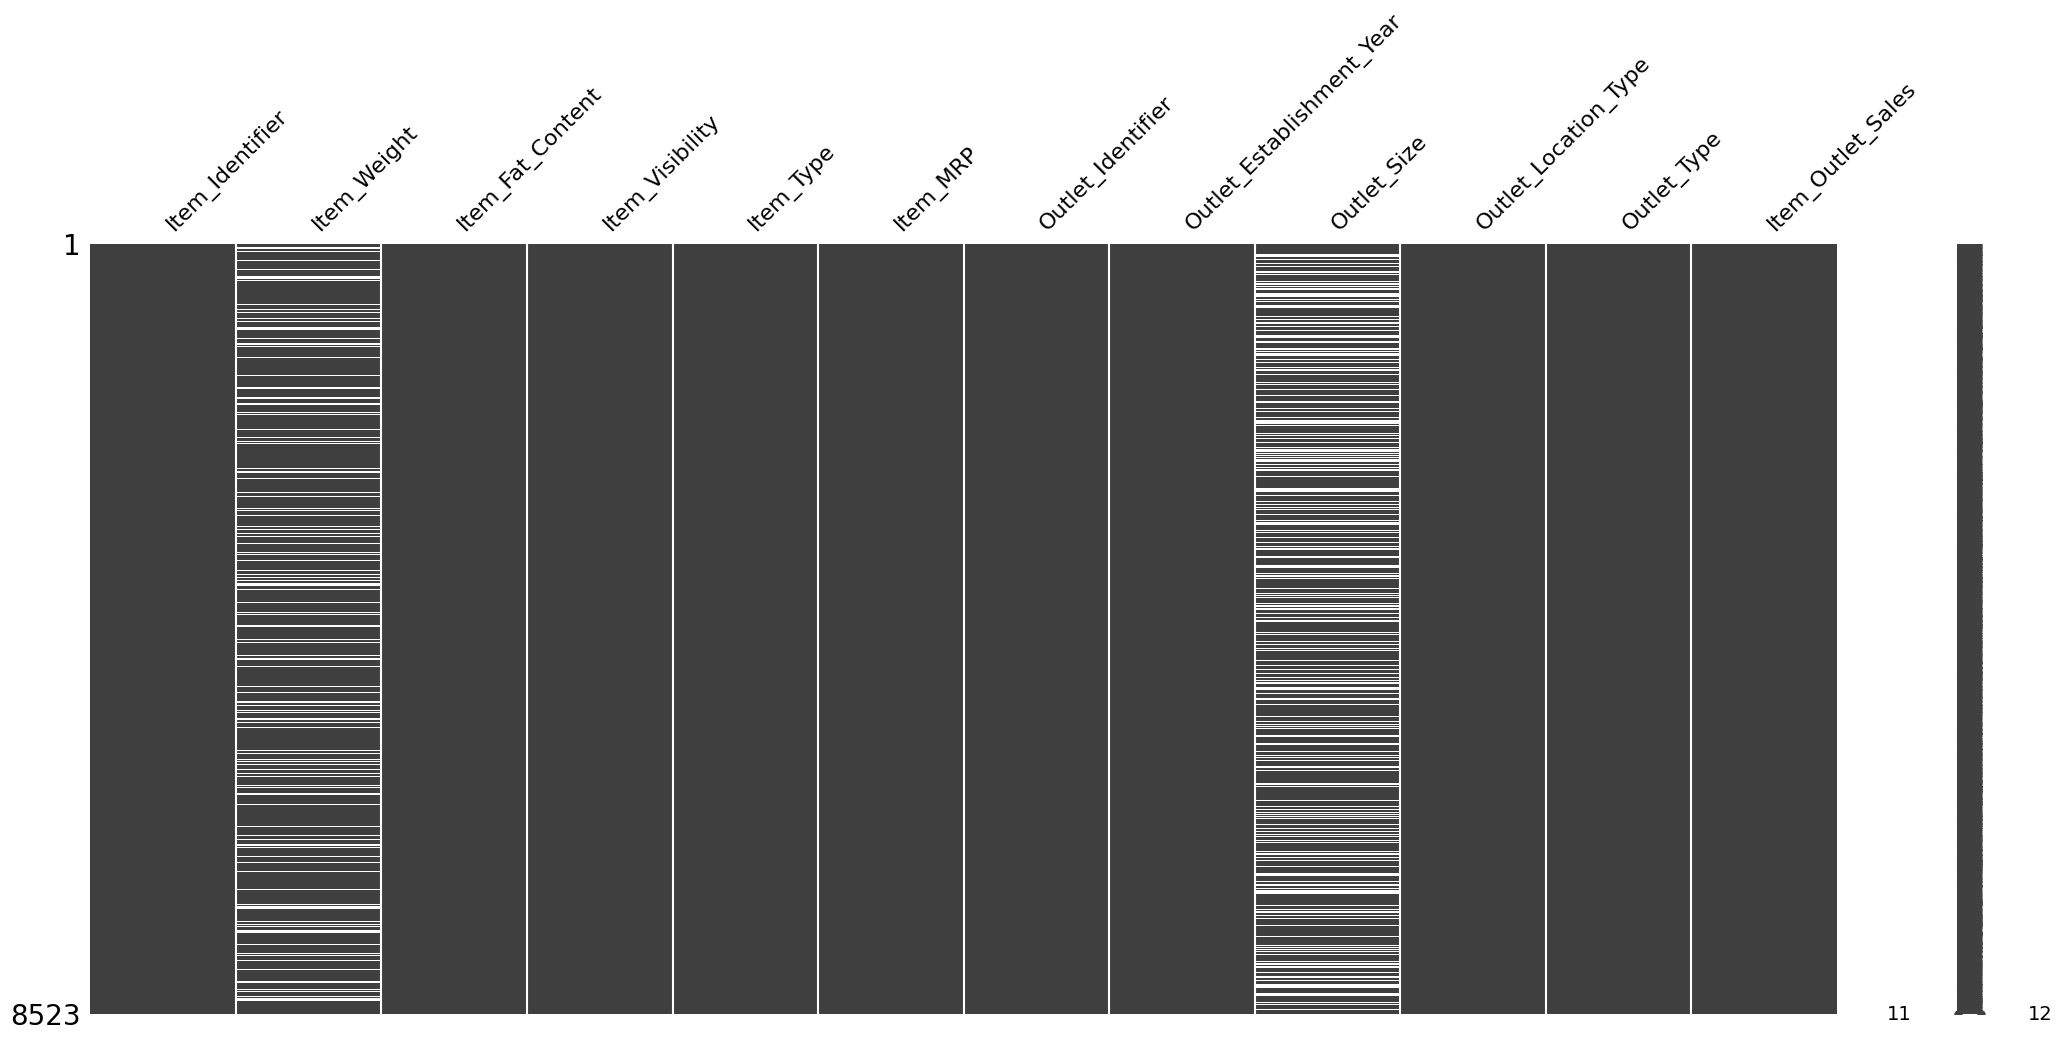

In [26]:
#  Visualing missing data in matrix
msno.matrix(sales_df_copy)

#### Sorting out string/object features

In [27]:
objs_cols = sales_df_copy.select_dtypes('object').columns

sales_df_copy[objs_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

#### Visulaising

In [30]:
sales_df_copy[['Outlet_Size']].value_counts(dropna=False)

Outlet_Size
Medium         2793
NaN            2410
Small          2388
High            932
dtype: int64

#### Filling up missing values

In [32]:
sales_df_copy['Outlet_Size'].fillna('MISSING', inplace=True)
sales_df_copy[['Outlet_Size']].value_counts(dropna=False)

Outlet_Size
Medium         2793
MISSING        2410
Small          2388
High            932
dtype: int64

#### Placing placeholders

#### Replacing missing values with a placeholder value
#### Sorting out number features

In [37]:

number_columns = sales_df_copy.select_dtypes('number').columns

sales_df_copy[number_columns].isna().sum()
sales_df_copy['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

#### describing the Item_Weight


In [39]:
sales_df_copy['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

#### Filling the missing value with 999

In [42]:
mean = sales_df_copy['Item_Weight'].mean()
sales_df_copy['Item_Weight'].fillna(mean, inplace=True)

#### Visualizing using .value_counts() method


In [43]:
sales_df_copy['Item_Weight'].value_counts(dropna=True)

111.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64

#### Comfriming missing values

<Axes: >

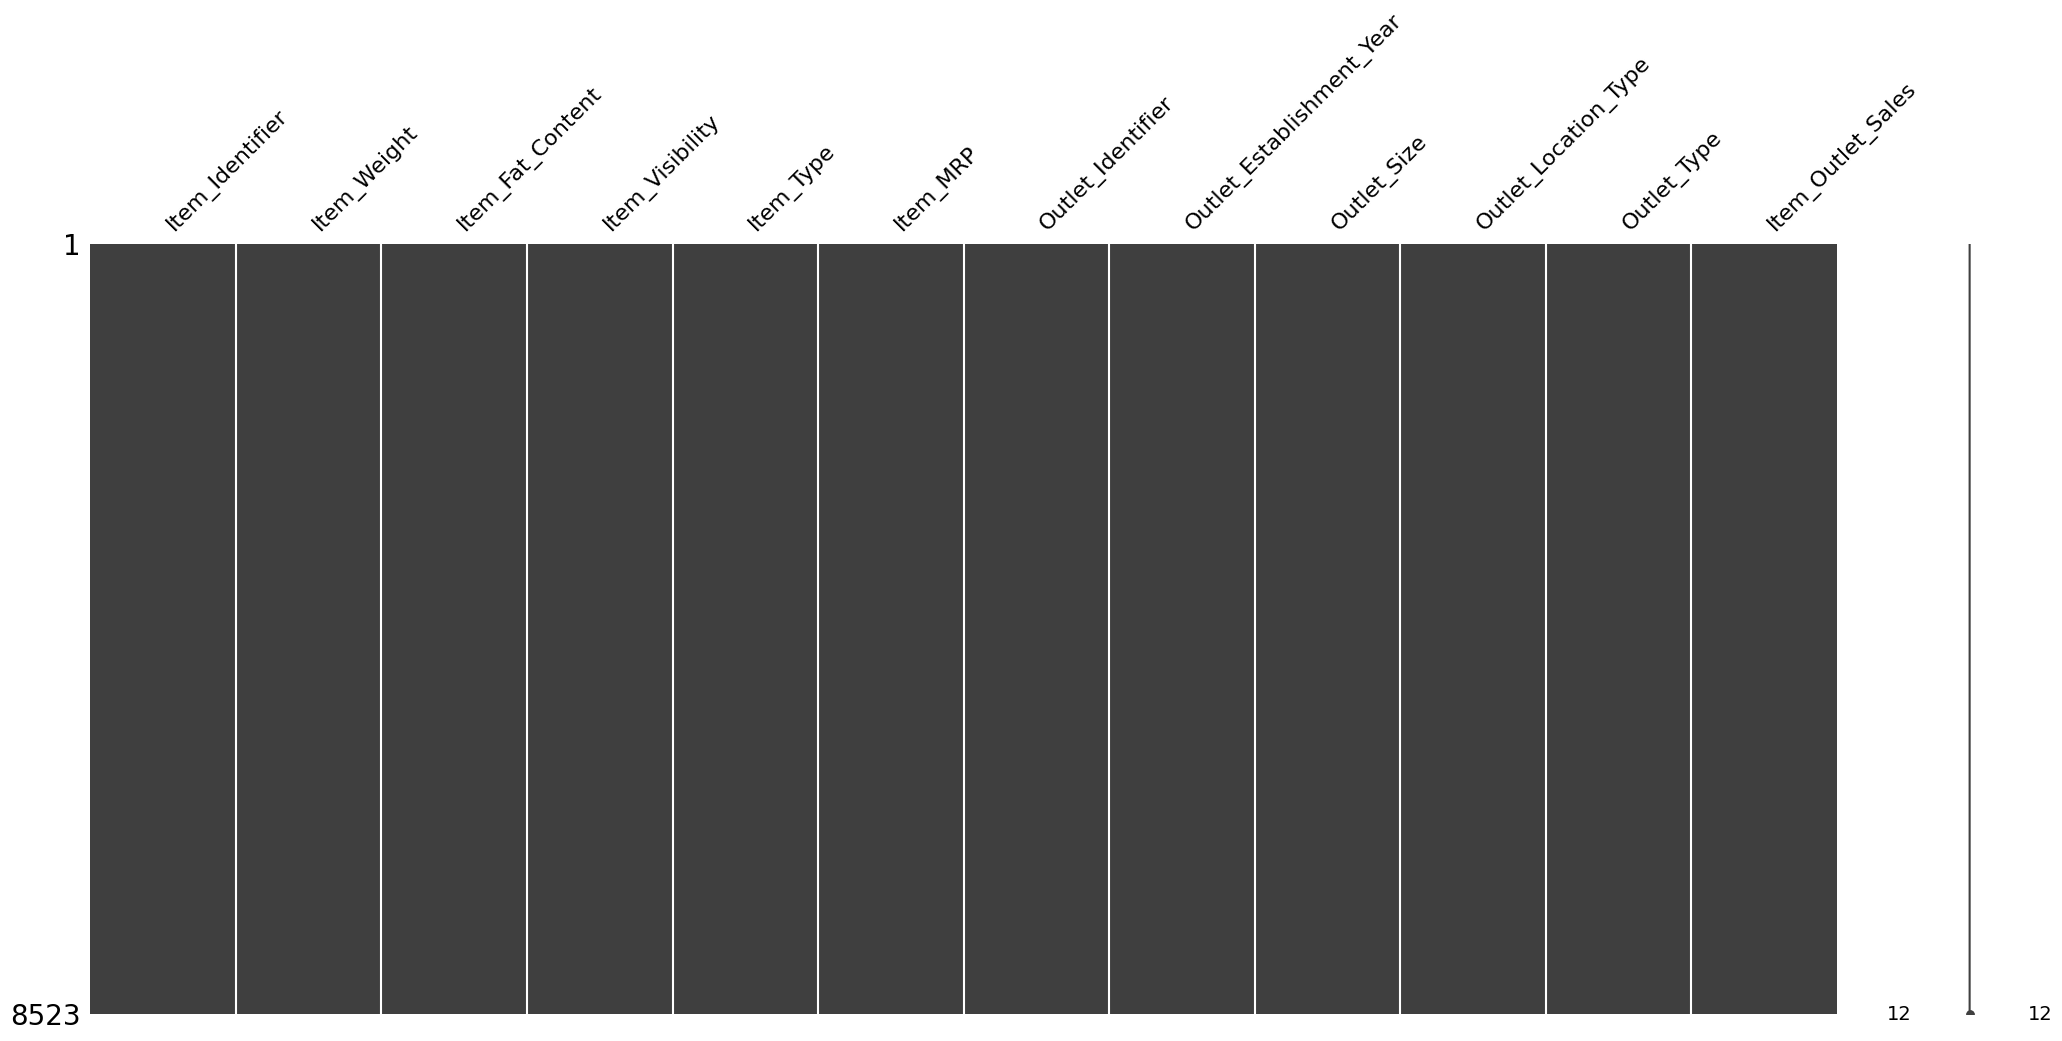

In [44]:
msno.matrix(sales_df_copy)

#### Looking through each column and its properties by ;ooking through the coulmns

In [47]:
for item in sales_df_copy:
  print(f'{item} column')
  print(f"{sales_df_copy[item].value_counts()}")
  print('\n')

Item_Identifier column
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Weight column
111.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64


Item_Fat_Content column
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Visibility column
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Item_Type column
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy               

#### Working on inconsistency column

In [48]:
sales_df_copy['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:

sales_df_copy['Item_Fat_Content'].replace({
    "LF" : 'Low Fat',
    "reg" : 'Regular',
    "low fat" : 'Low Fat'
}, inplace=True)

sales_df_copy['Item_Fat_Content'].value_counts(dropna=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Visualizing central tendency for numerical features


In [50]:
for item in number_columns:
  print(f"{item} Feature/Column/Series Central tendency")
  print(f'{sales_df_copy[item].describe()}')
  print('\n')

Item_Weight Feature/Column/Series Central tendency
count    8523.000000
mean       29.704092
std        37.250074
min         4.555000
25%         9.310000
50%        14.500000
75%        19.500000
max       111.000000
Name: Item_Weight, dtype: float64


Item_Visibility Feature/Column/Series Central tendency
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Item_MRP Feature/Column/Series Central tendency
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Outlet_Establishment_Year Feature/Column/Series Central tendency
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000


#### Viszualizing the dataframe

##### Histograms to view the distributions of numerical features in your dataset.

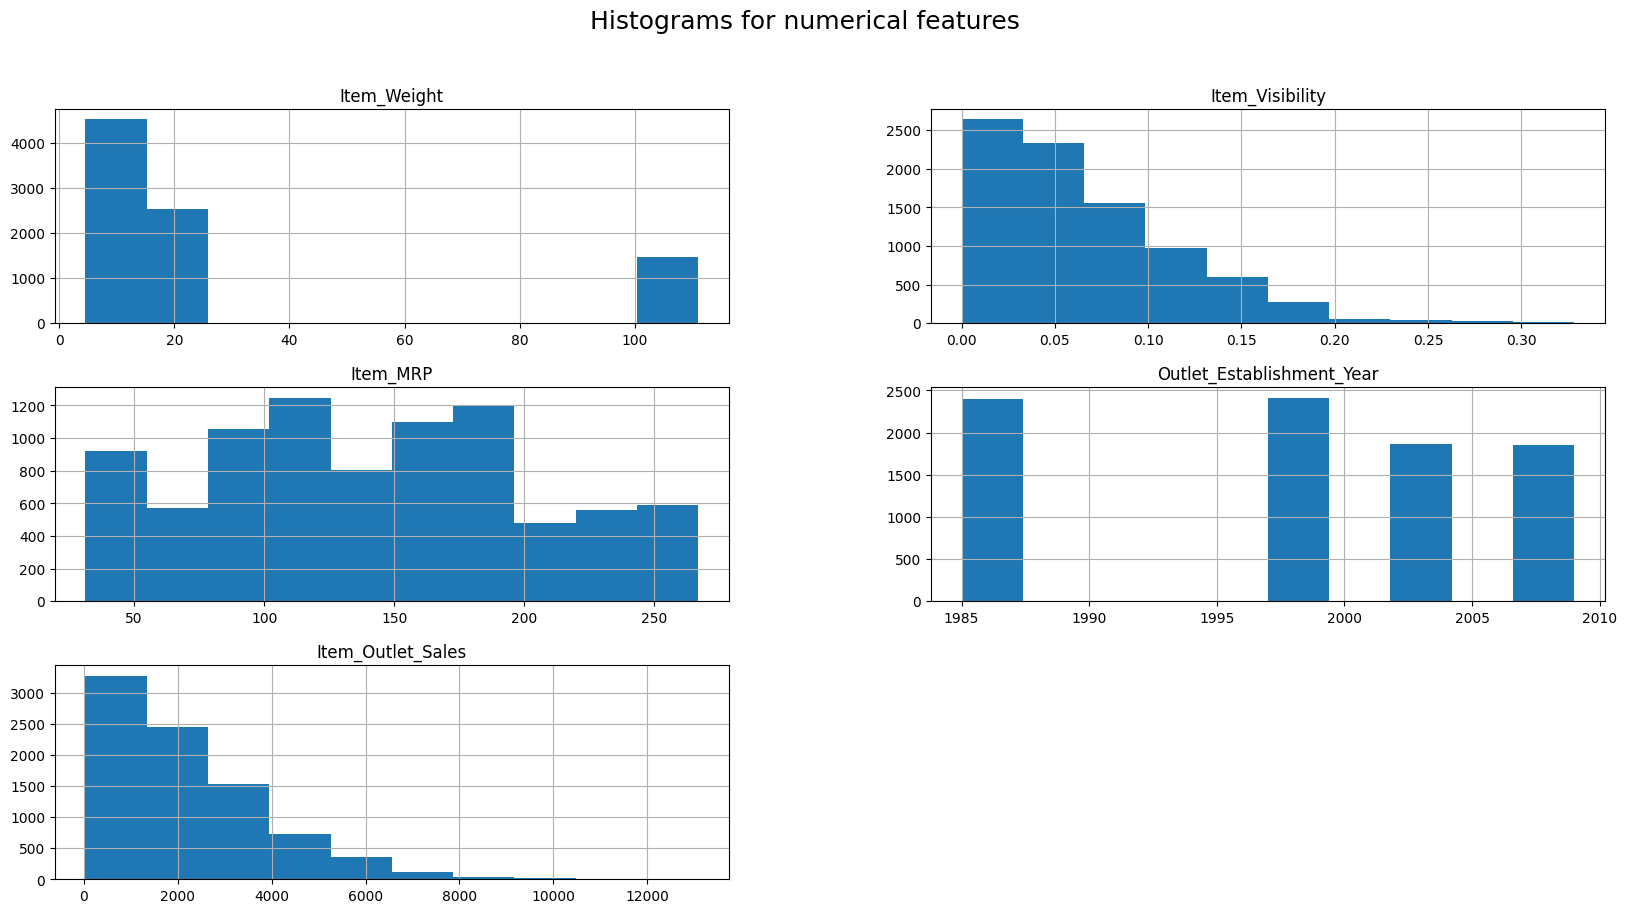

In [51]:
numerical_features = sales_df_copy.select_dtypes('number').columns

sales_df_copy[numerical_features].hist(bins=10, figsize=(20, 10))
plt.suptitle('Histograms for numerical features', fontsize=18)
plt.show();

# Boxplots to view statistical summaries of numerical features in your dataset.

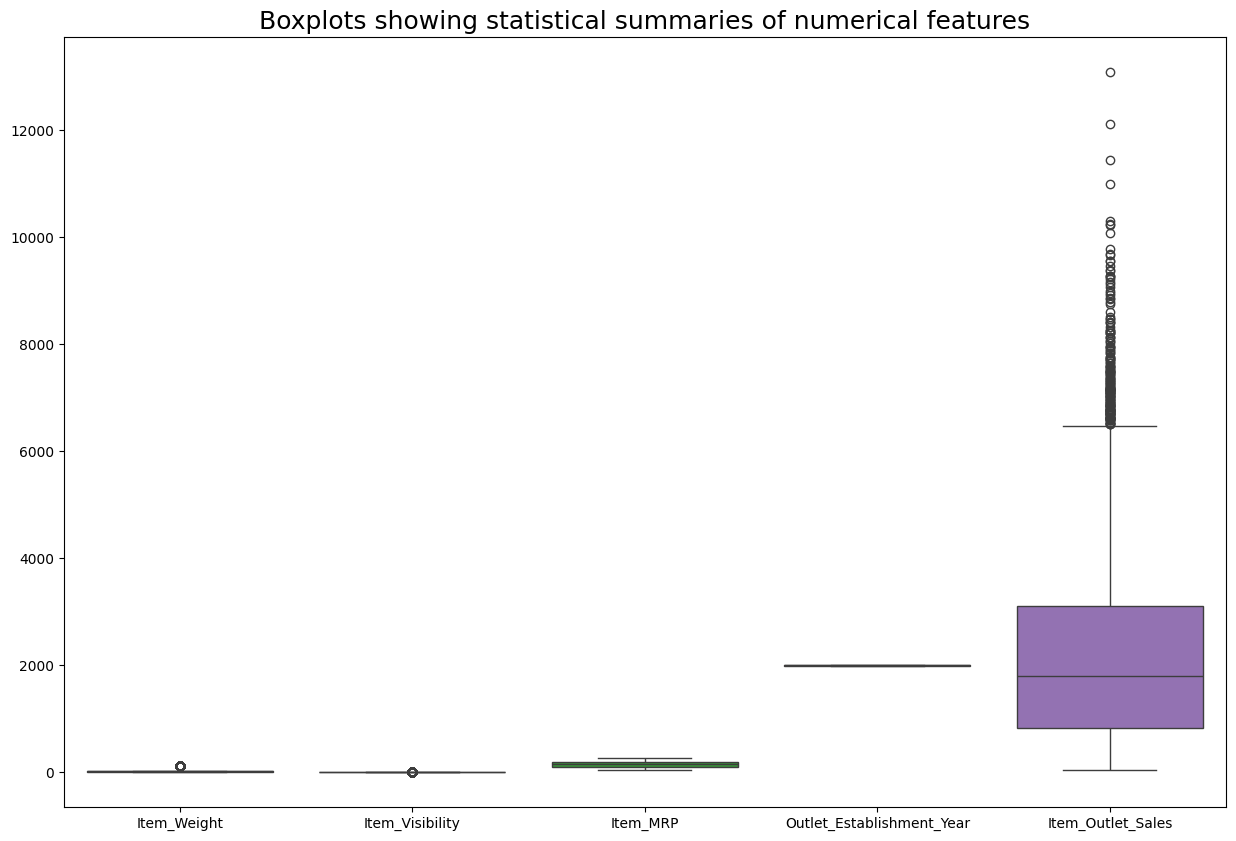

In [53]:

plt.figure(figsize=(15, 10))
sns.boxplot(data=sales_df_copy[numerical_features])
plt.title('Boxplots showing statistical summaries of numerical features', fontsize=18)
plt.show();

# Countplots to view the frequency of each class of categorial features in your dataset.


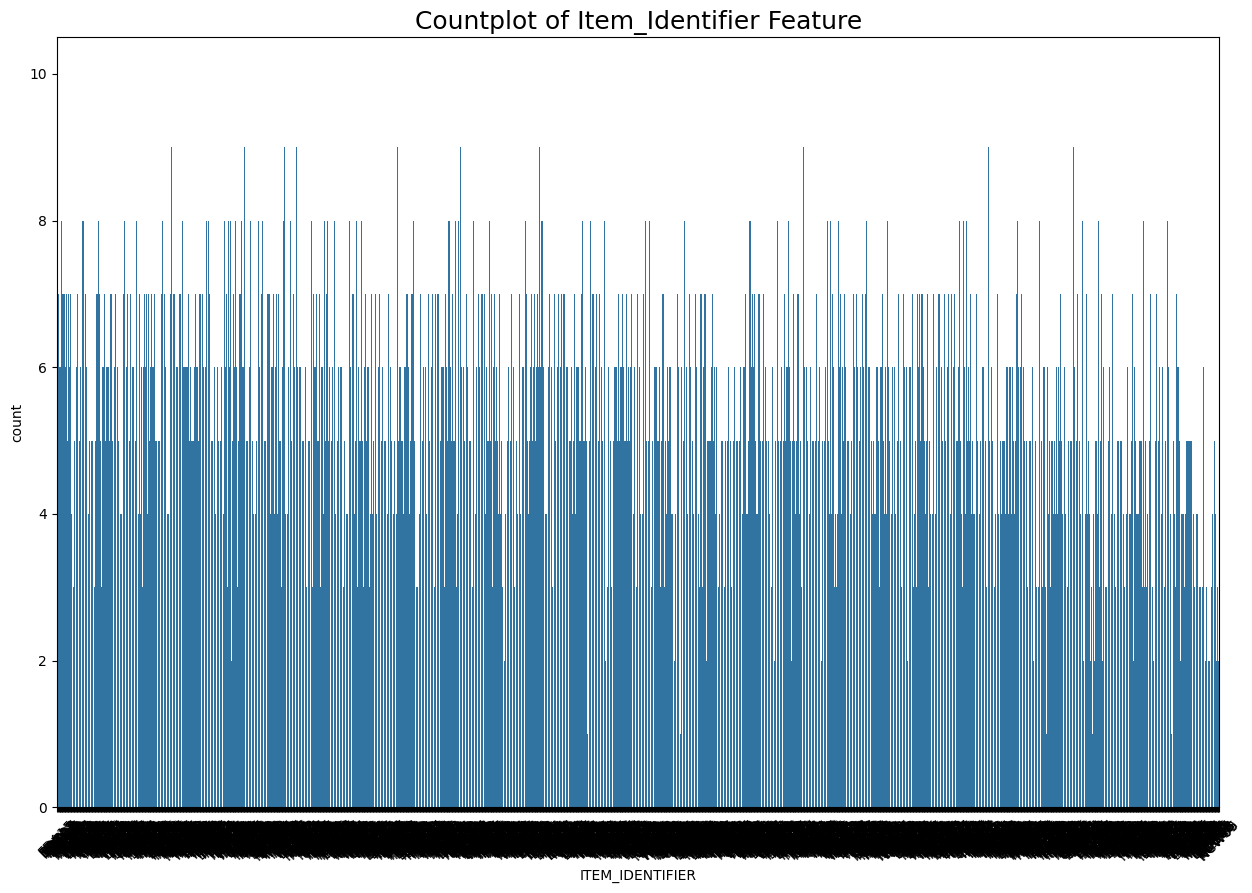

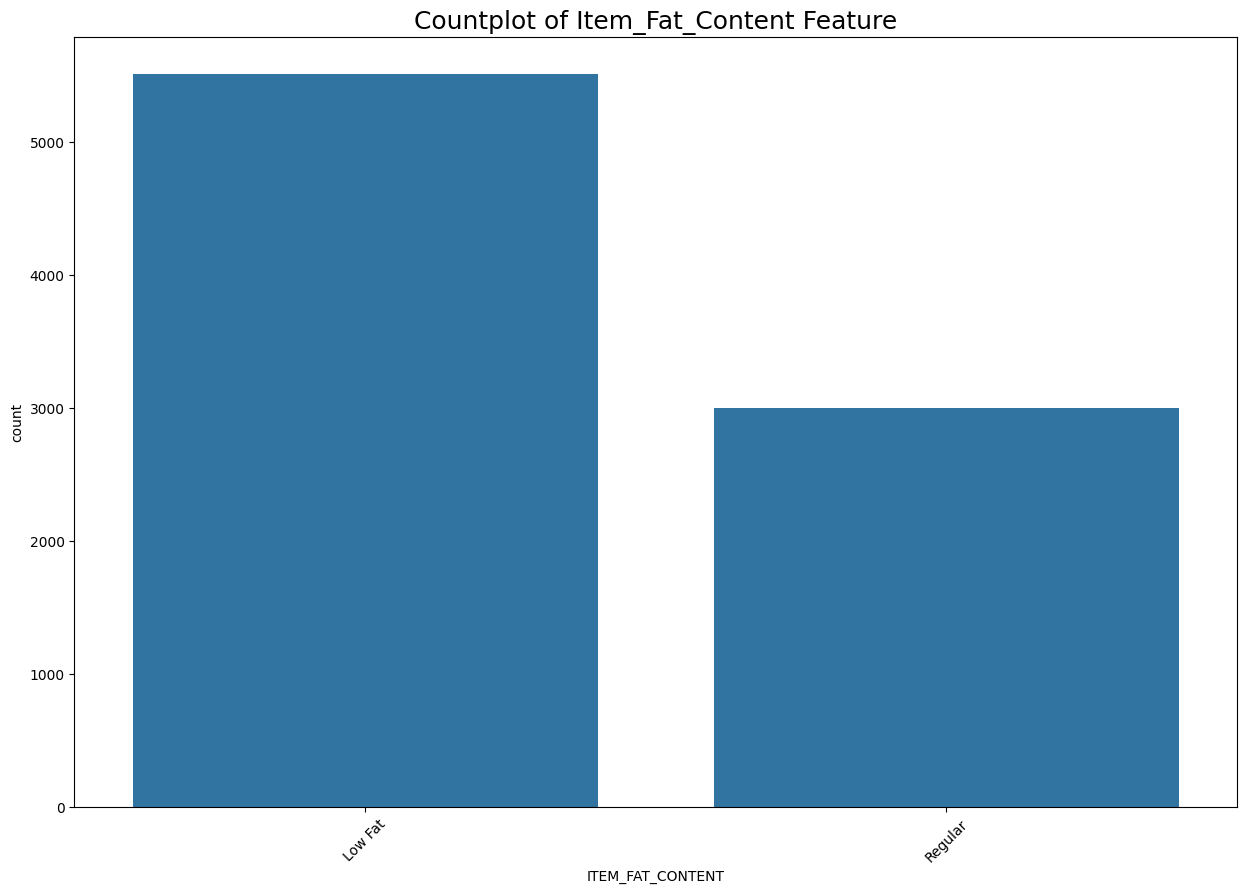

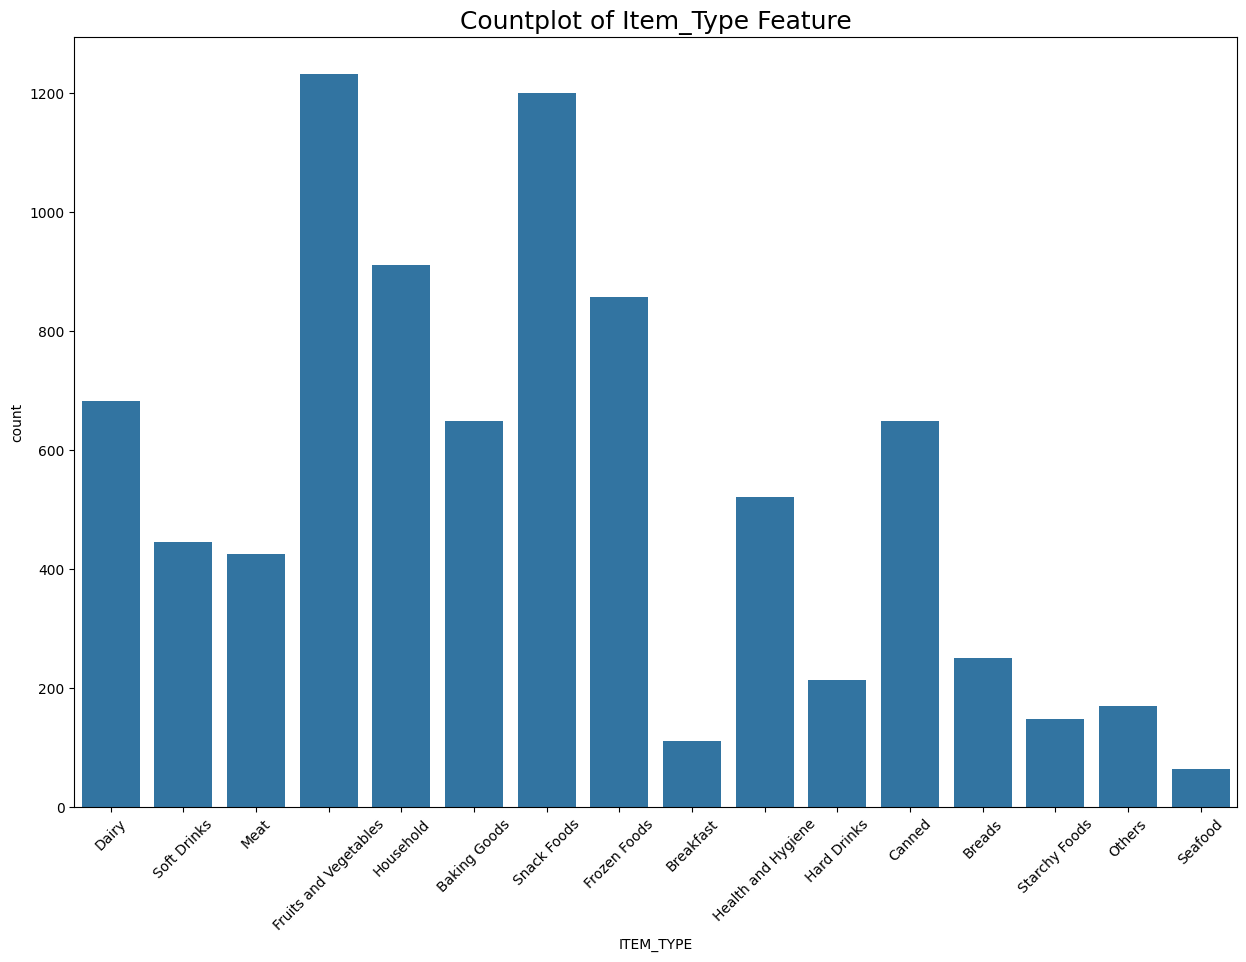

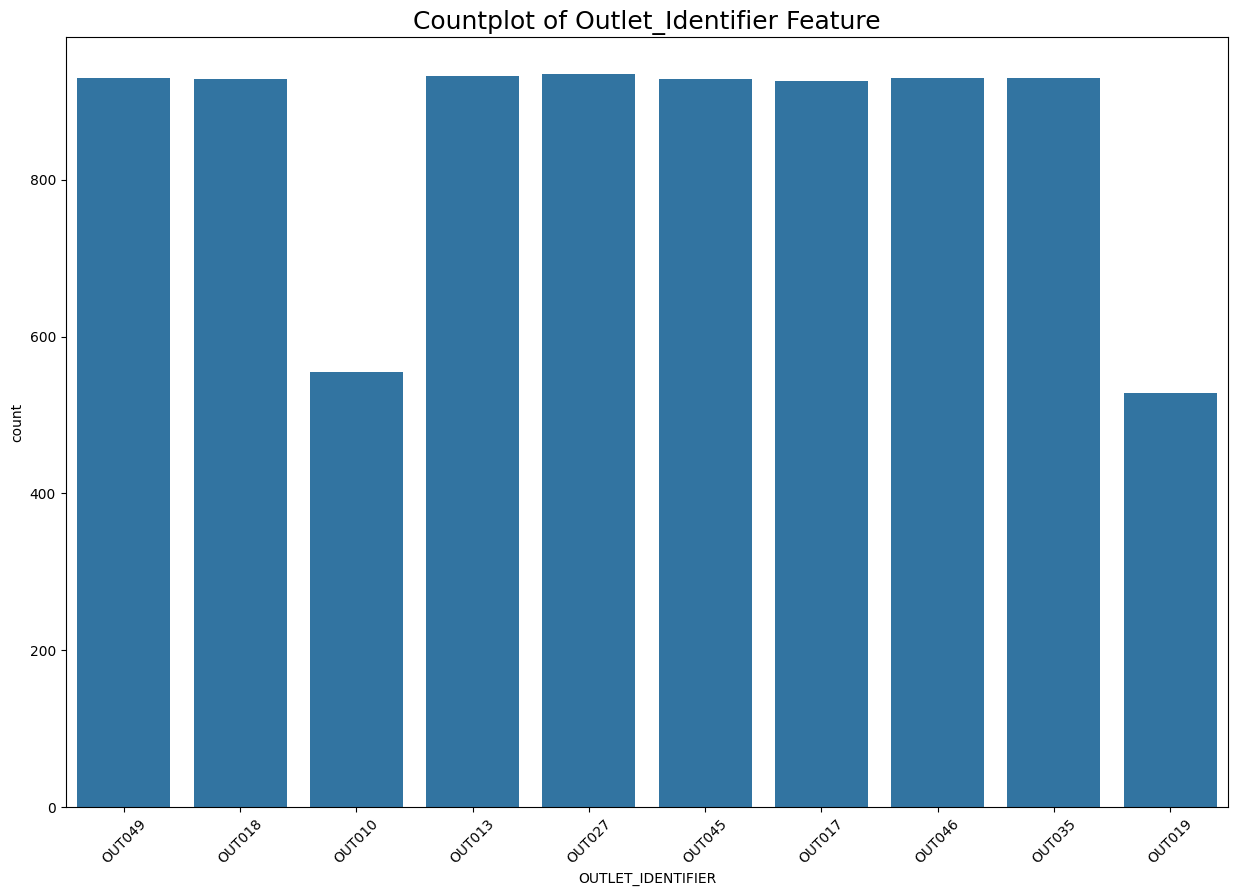

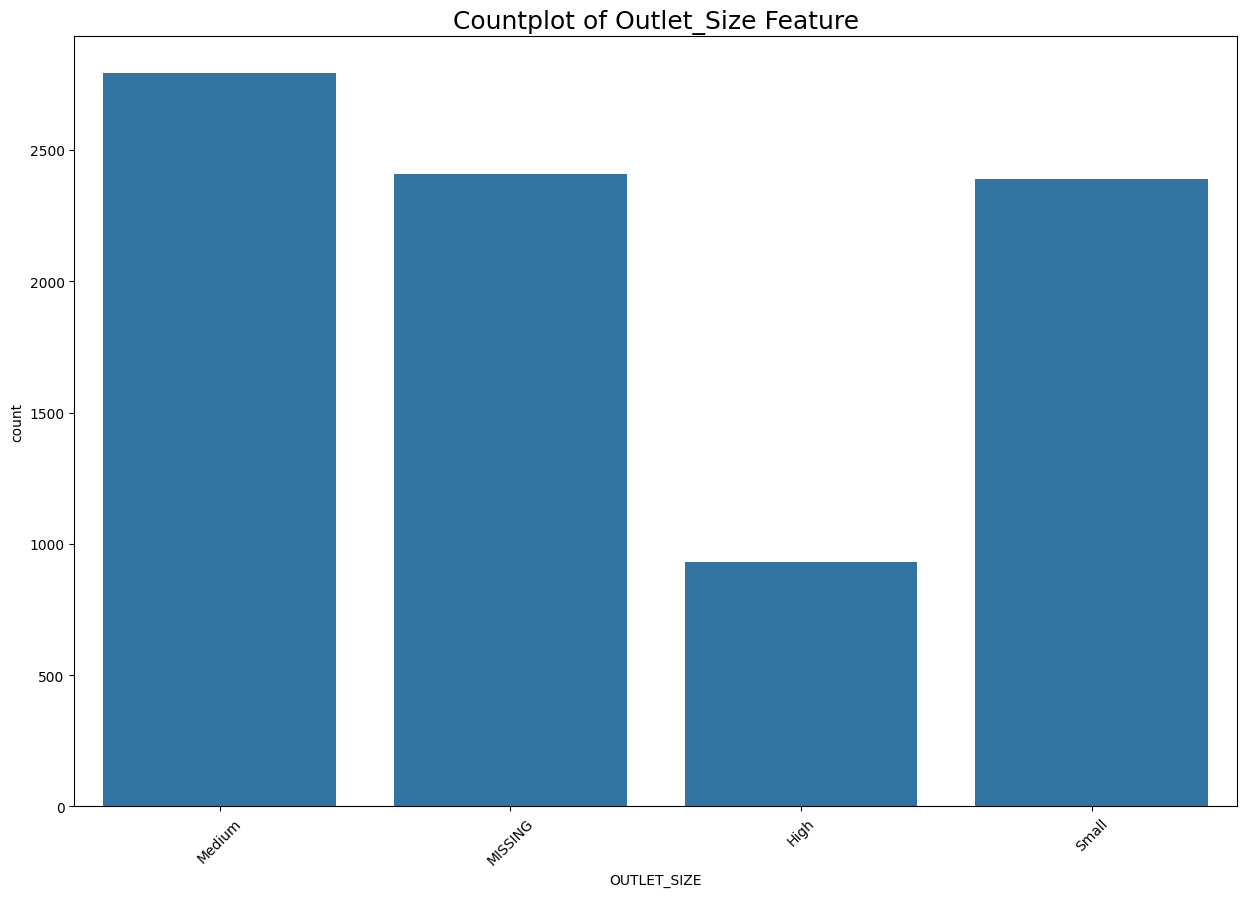

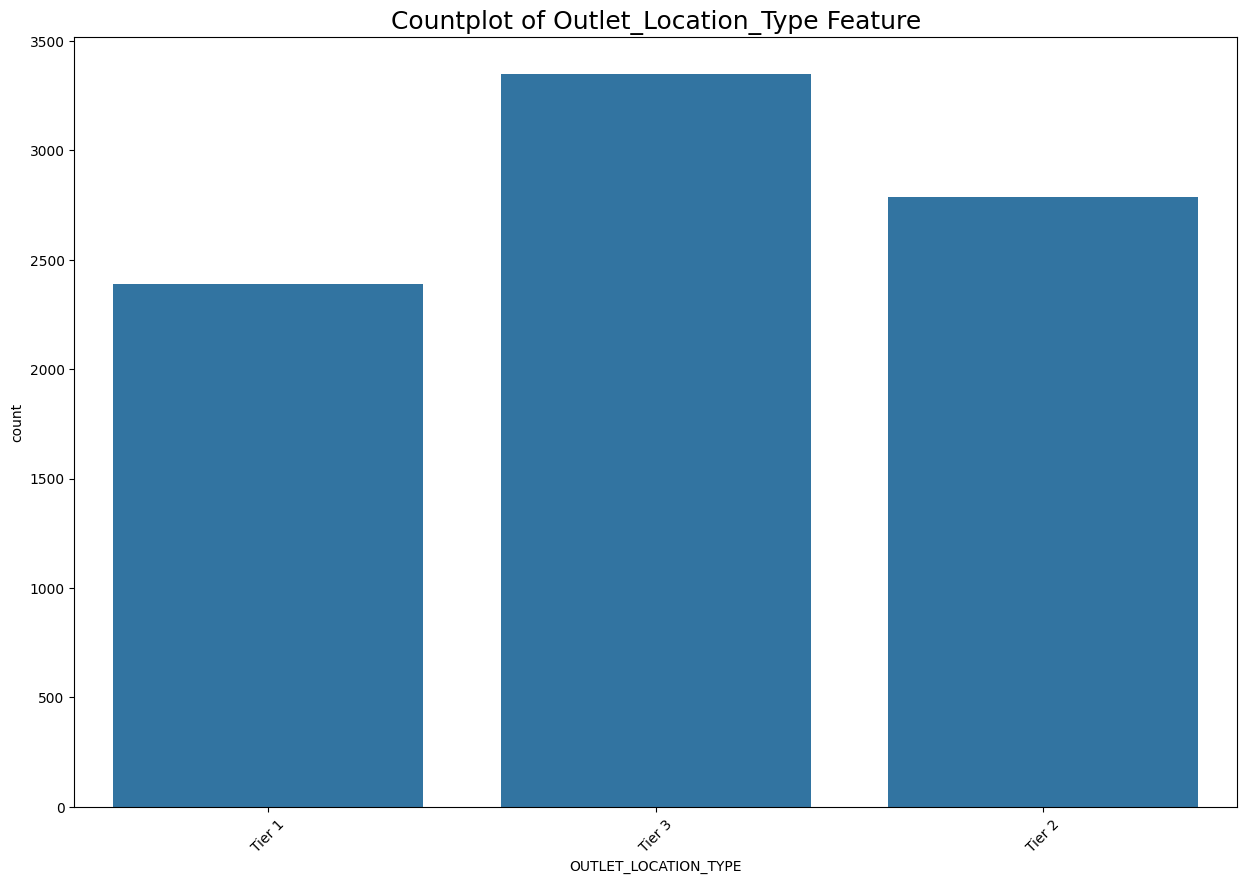

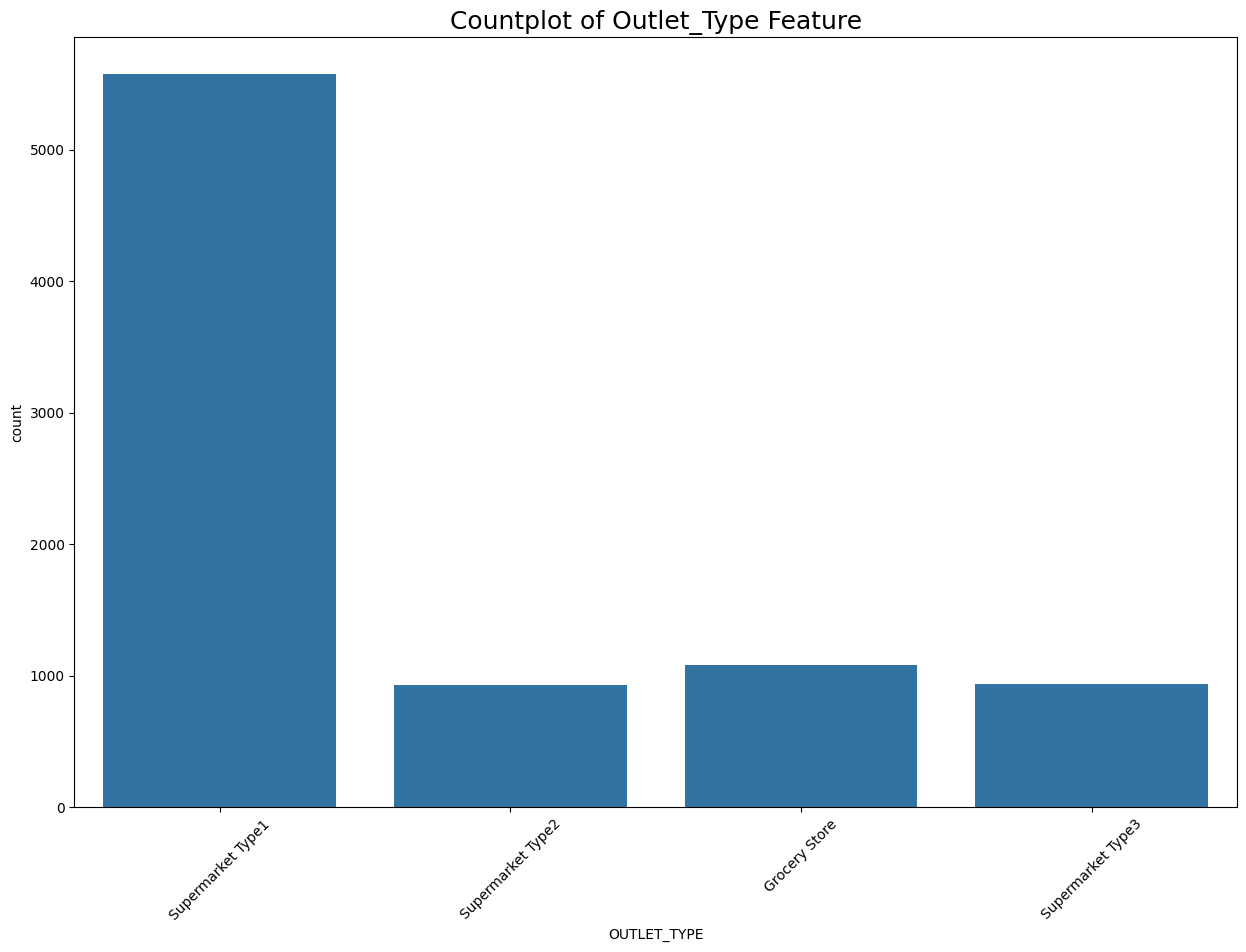

In [54]:
categorical_features = sales_df_copy.select_dtypes('object').columns

def count_plot(cate):
  plt.figure(figsize=(15, 10))
  plt.title(f'Countplot of {cate} Feature', fontsize=18)
  sns.countplot(data=sales_df_copy, x=cate)
  plt.xticks(rotation=45)
  plt.xlabel(item.upper())
  plt.show();

for item in categorical_features:
  count_plot(item)
  print('\n')

# Heatmap to view the correlation between features

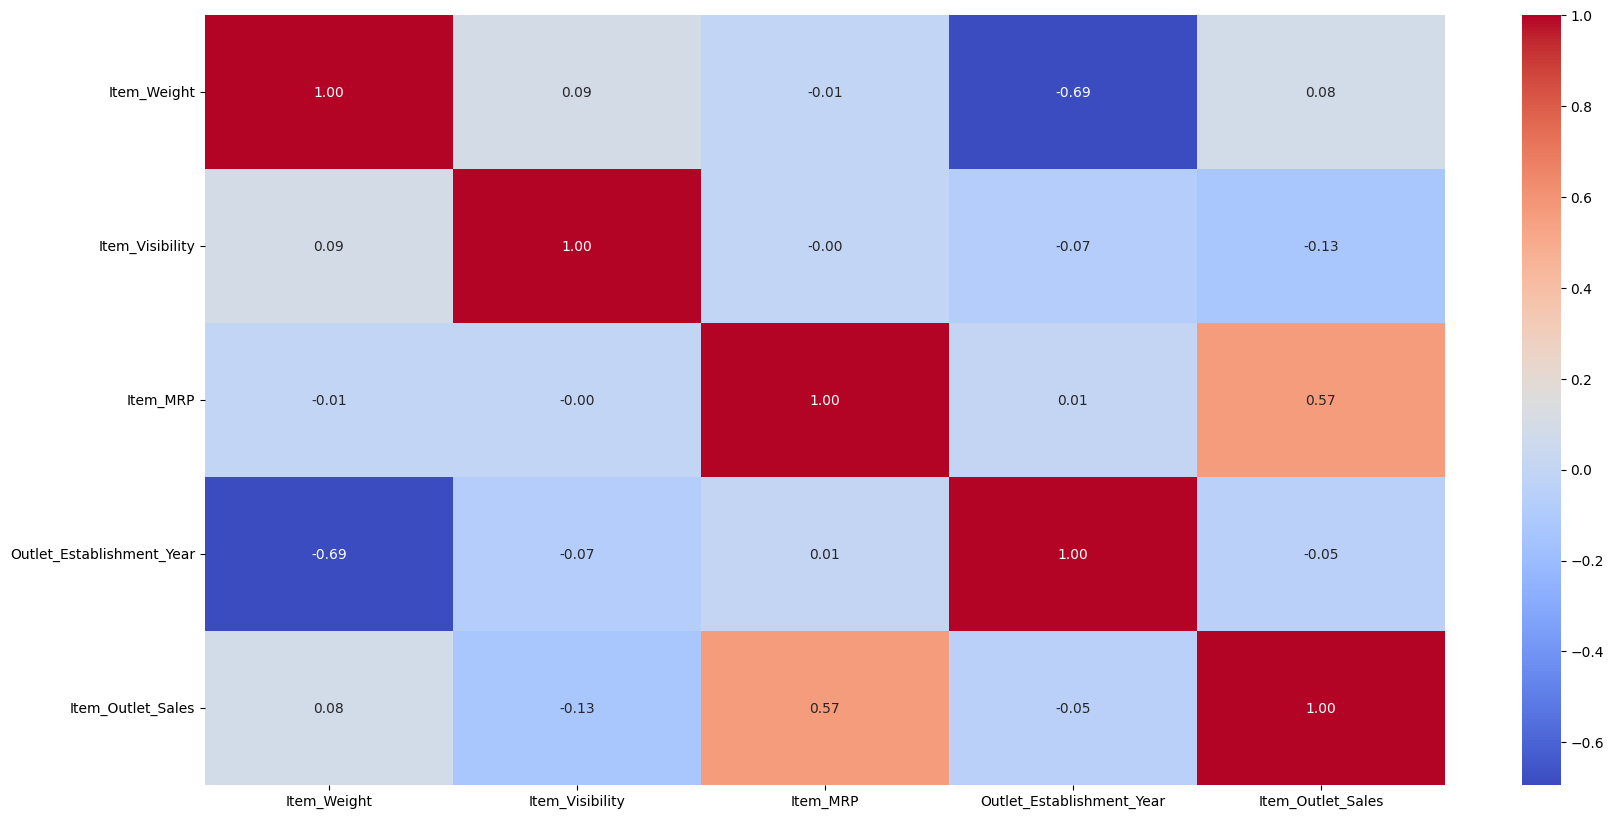

In [55]:
plt.figure(figsize=(20, 10))
corr = sales_df_copy.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show();

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Categorical`
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `2410 at 28.28%, imputed with MISSING`

3. Is the feature constant or quasi-constant?
  - `Quasi-constant`

4. What is the cardinality? Is it high?
  - `Four and it is moderate`

5. Would we know this BEFORE the target is determined?
  - `No`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `No`